# RNAseq analysis by Kim
Here I am using Kim's code to just reproduce the results.

In [3]:
setwd("C:/Users/nmishra/Dropbox/PC/Desktop/HK EXIT STRATEGY/jupyter codes")

In [4]:
suppressMessages(suppressWarnings(source("./jupyter_common.R")))

load('./rdata/jupyter_common.rdata')
load('./rdata/riboprof_170224.rdna_rn18s_161021.rdna_rn18s_limma-voom.mrna.rdata')

In [6]:
f_display_sym <- FALSE
seed_geom_text_repel <- 40
#biotype_exclude <- NULL
biotype_exclude <- "pseudogene"  # current choice of fig1
#biotype_exclude <- "protein_coding|pseudogene"
#biotype_include <- NULL
biotype_include <- "protein_coding"  # current choice of fig1
fname_appendix <- ""
if (!is.null(biotype_include)) {
  fname_appendix <- sprintf("_%s", gsub("\\|", "_", biotype_include))
} 
if (!is.null(biotype_exclude)) {
  fname_appendix <- sprintf("%s_wo_%s", fname_appendix, gsub("\\|", "_", biotype_exclude))
} 
fname_appendix


if (!is.null(biotype_exclude)) {
  f <- grepl(biotype_exclude, df_all$biotype)
  df_exclude <- df_all[f, ]
  show(head(df_exclude))
  show(dim(df_exclude))
  excludes <- rownames(df_exclude)
  
  sym_mrna_only <- setdiff(sym_mrna_only, excludes)
  sym_mrna_up_ribo_up <- setdiff(sym_mrna_up_ribo_up, excludes)
  sym_mrna_dn_ribo_dn <- setdiff(sym_mrna_dn_ribo_dn, excludes)
  sym_mrna_no_ribo_up <- setdiff(sym_mrna_no_ribo_up, excludes)
  sym_mrna_no_ribo_dn <- setdiff(sym_mrna_no_ribo_dn, excludes)
  sym_mrna_up_ribo_dn <- setdiff(sym_mrna_up_ribo_dn, excludes)
  sym_mrna_dn_ribo_up <- setdiff(sym_mrna_dn_ribo_up, excludes)    
}



if (!is.null(biotype_include)) {
  f <- grepl(biotype_include, df_all$biotype)
  df_include <- df_all[f, ]
  show(head(df_include))
  show(dim(df_include))
  include_genes <- rownames(df_include)
  
  sym_mrna_only <- intersect(sym_mrna_only, include_genes)
  sym_mrna_up_ribo_up <- intersect(sym_mrna_up_ribo_up, include_genes)
  sym_mrna_dn_ribo_dn <- intersect(sym_mrna_dn_ribo_dn, include_genes)
  sym_mrna_no_ribo_up <- intersect(sym_mrna_no_ribo_up, include_genes)
  sym_mrna_no_ribo_dn <- intersect(sym_mrna_no_ribo_dn, include_genes)
  sym_mrna_up_ribo_dn <- intersect(sym_mrna_up_ribo_dn, include_genes)
  sym_mrna_dn_ribo_up <- intersect(sym_mrna_dn_ribo_up, include_genes)    
}

[1] "_protein_coding_wo_pseudogene"

              seqnames     start       end width strand         source
1810014B01Rik       10  86685525  86694806  9282      +         havana
2610005L07Rik        8  20385782  20424814 39033      -         havana
2700099C18Rik       17  94750100  94775132 25033      +         havana
2810025M15Rik        1 157412352 157420236  7885      + ensembl_havana
3000002C10Rik        9 109827943 109832706  4764      - ensembl_havana
3110053B16Rik       12  20874125  20921262 47138      -         havana
              unt48.transcription tgfb48.transcription
1810014B01Rik         0.335289542            -1.529324
2610005L07Rik         2.618925520             2.270700
2700099C18Rik        -1.621820482            -2.640801
2810025M15Rik         0.665907055             1.081391
3000002C10Rik        -1.616033629            -2.464902
3110053B16Rik         0.008202205             0.436363
              tgfbCX5461100nm.transcription log2FCunt48VStgfb48.transcription
1810014B01Rik                    -1.6586

sym_mrna_only: 2644
sym_mrna_up_ribo_up: 925
sym_mrna_dn_ribo_dn: 759
sym_mrna_no_ribo_up: 156
sym_mrna_no_ribo_dn: 163


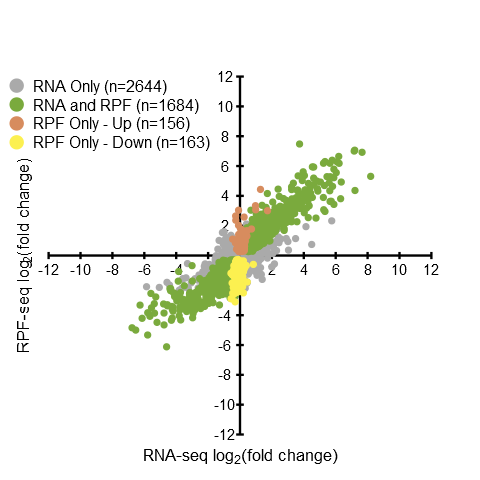

In [4]:
#rpf_only_up_dn

df_fig <- df_all
sym <- rownames(df_fig)
df_fig$fig.type <- NA

verb("sym_mrna_only: %d\n", length(sym_mrna_only))
f <- sym %in% sym_mrna_only
str_mrna_only <- sprintf("RNA Only (n=%d)", length(sym_mrna_only))
df_fig[f, "fig.type"] <- str_mrna_only

verb("sym_mrna_up_ribo_up: %d\n", length(sym_mrna_up_ribo_up))
verb("sym_mrna_dn_ribo_dn: %d\n", length(sym_mrna_dn_ribo_dn))
f <- sym %in% sym_mrna_up_ribo_up | sym %in% sym_mrna_dn_ribo_dn
str_mrna_rpf <- sprintf("RNA and RPF (n=%d)", length(sym_mrna_up_ribo_up)+length(sym_mrna_dn_ribo_dn))
df_fig[f, "fig.type"] <- str_mrna_rpf

verb("sym_mrna_no_ribo_up: %d\n", length(sym_mrna_no_ribo_up))
f <- sym %in% sym_mrna_no_ribo_up
str_rpf_only_up <- sprintf("RPF Only - Up (n=%d)", length(sym_mrna_no_ribo_up))
df_fig[f, "fig.type"] <- str_rpf_only_up

verb("sym_mrna_no_ribo_dn: %d\n", length(sym_mrna_no_ribo_dn))
f <- sym %in% sym_mrna_no_ribo_dn
str_rpf_only_dn <- sprintf("RPF Only - Down (n=%d)", length(sym_mrna_no_ribo_dn))
df_fig[f, "fig.type"] <- str_rpf_only_dn
# verb('sym_no_de_both: %d\n',length(sym_no_de_both)); f <- sym %in%
# sym_no_de_both; df_fig[f, 'fig.type'] <- 'No DE'

f <- !is.na(df_fig$fig.type) & !is.na(df_fig$log2FCunt48VStgfb48.transcription) & 
  !is.na(df_fig$log2FCunt48VStgfb48.translation)
df_fig <- df_fig[f, ]
df_fig$fig.type <- factor(df_fig$fig.type, level = c(str_mrna_only, str_mrna_rpf, str_rpf_only_up, str_rpf_only_dn))
df_fig <- df_fig[order(df_fig$fig.type), ]

nv_color <- c('RNA Only'='#aaaaaa',
              'RNA and RPF'='#7aaa3d',
              'RPF Only - Up'='#d78c5e',
              'RPF Only - Down'='#fcf050')
names(nv_color) <- levels(df_fig$fig.type)



nticks=13; xmax=12; ymax=12; gap_tick_label=4
gg <- ggplot(data=df_fig,
             aes(x=log2FCunt48VStgfb48.transcription, 
                 y=log2FCunt48VStgfb48.translation, colour=fig.type)) + 
  theme_geometry(ticks=nticks, xlim=xmax, ylim=ymax, linesize=0.5, 
                 xlab=expression('RNA-seq log'[2]*'(fold change)'),
                 ylab=expression('RPF-seq log'[2]*'(fold change)'),
                 labsize=3.5, labgap=1.5, epsilon=max(xmax,ymax)/50, gap_tick_label=gap_tick_label) +
  geom_point(alpha=1, size=1) +
  theme(legend.title=element_blank(), 
        legend.text=element_text(size=9),
        legend.background = element_rect(color = NA),
        legend.key = element_rect(fill = "white", color = NA),
        legend.key.size = unit(0.4, "cm"),
        legend.key.width = unit(0,"cm"),
        #legend.spacing.y = unit(0.5, "cm"),          
        legend.position = c(0.02, 0.92), legend.justification = c(0, 1) ) +
  guides(colour = guide_legend(override.aes = list(size=3))) +
  ggtitle("") +
  scale_colour_manual(values = nv_color)

if (f_display_sym) {
  
  df_fig$sig <- 'no'; 
  df_fig$sym <- rownames(df_fig)  
  f_sym <- grepl('Malat', df_fig$sym)
  
  th_log2fc <- log2(1.2)
  f_tgfb48_rnaseq_up_rpf_up <- !is.na(df_fig$fig.type) & df_fig$log2FCunt48VStgfb48.transcription > th_log2fc & df_fig$log2FCunt48VStgfb48.translation > th_log2fc
  f_tgfb48_rnaseq_dn_rpf_up <- !is.na(df_fig$fig.type) & df_fig$log2FCunt48VStgfb48.transcription < -th_log2fc & df_fig$log2FCunt48VStgfb48.translation > th_log2fc
  df_fig$sig[f_tgfb48_rnaseq_up_rpf_up & f_sym] <- 'up_up';
  df_fig$sig[f_tgfb48_rnaseq_dn_rpf_up & f_sym] <- 'dn_up';
  #f <- grepl("Gm|Rik", df_fig$sym)
  #df_fig$sig[f] <- 'no'
  
  require('ggrepel')
  df_fig$nudge_x <- 0.2
  df_fig$nudge_x[f_tgfb48_rnaseq_dn_rpf_up] <- -0.2 
  df_fig$nudge_y <- 0.2
  #f <- grepl("Malat1", df_fig$sym)
  #df_fig[f, 'nudge_x'] <- 0.4  
  #df_fig[f, 'nudge_y'] <- 0.4
  
  # change name
  df_fig$sym <- mgsub::mgsub(df_fig$sym,
                             tolower(c('HALLMARK','_')), c('',' '))
  #df_fig$sym <- str_wrap(df_fig$sym, width=15)
  
  f <- df_fig$sig != 'no'
  if (any(f)) {
    df1 <- df_fig[f,,drop=F]          
    gg <- gg + geom_text_repel(data=df1,
                               aes(label=sym, lineheight=.75),
                               size=3.5, colour='black',
                               force=1, box.padding=0.25, point.padding=0.5,
                               min.segment.length = unit(0, 'lines'),          
                               nudge_x=df1$nudge_x, nudge_y=df1$nudge_y,
                               seed=seed_geom_text_repel)
  }
  
}

print_figure(gg, width=4, height=4,
             file=sprintf("scatter_plot.fig1%s.rpf_only_up_dn", fname_appendix))

sym_mrna_only: 2644
sym_mrna_up_ribo_dn: 3
sym_mrna_dn_ribo_up: 11
sym_mrna_up_ribo_up: 925
sym_mrna_dn_ribo_dn: 759
sym_mrna_no_ribo_up: 156
sym_mrna_no_ribo_dn: 163


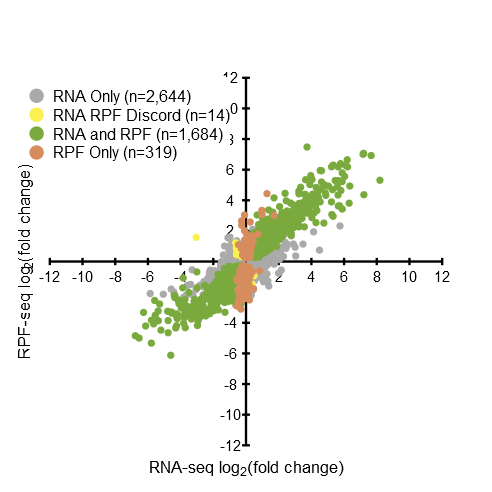

In [10]:
#Fig 1
df_fig <- df_all
sym <- rownames(df_fig)
df_fig$fig.type <- NA

verb("sym_mrna_only: %d\n", length(sym_mrna_only))
f <- sym %in% sym_mrna_only
str_mrna_only <- sprintf("RNA Only (n=%s)", format(length(sym_mrna_only), big.mark = ","))
df_fig[f, "fig.type"] <- str_mrna_only

verb("sym_mrna_up_ribo_dn: %d\n", length(sym_mrna_up_ribo_dn))
verb("sym_mrna_dn_ribo_up: %d\n", length(sym_mrna_dn_ribo_up))
f <- sym %in% sym_mrna_up_ribo_dn | sym %in% sym_mrna_dn_ribo_up
str_mrna_rpf_discord <- sprintf("RNA RPF Discord (n=%s)", format(length(sym_mrna_up_ribo_dn) + 
                                                                   length(sym_mrna_dn_ribo_up), big.mark = ","))
df_fig[f, "fig.type"] <- str_mrna_rpf_discord

verb("sym_mrna_up_ribo_up: %d\n", length(sym_mrna_up_ribo_up))
verb("sym_mrna_dn_ribo_dn: %d\n", length(sym_mrna_dn_ribo_dn))
f <- sym %in% sym_mrna_up_ribo_up | sym %in% sym_mrna_dn_ribo_dn
str_mrna_rpf <- sprintf("RNA and RPF (n=%s)", format(length(sym_mrna_up_ribo_up) + 
                                                       length(sym_mrna_dn_ribo_dn), big.mark = ","))
df_fig[f, "fig.type"] <- str_mrna_rpf

verb("sym_mrna_no_ribo_up: %d\n", length(sym_mrna_no_ribo_up))
verb("sym_mrna_no_ribo_dn: %d\n", length(sym_mrna_no_ribo_dn))
f <- sym %in% sym_mrna_no_ribo_up | sym %in% sym_mrna_no_ribo_dn
str_rpf_only <- sprintf("RPF Only (n=%s)", format(length(sym_mrna_no_ribo_up) + length(sym_mrna_no_ribo_dn), 
                                                  big.mark = ","))
df_fig[f, "fig.type"] <- str_rpf_only

f <- !is.na(df_fig$fig.type) & !is.na(df_fig$log2FCunt48VStgfb48.transcription) & 
  !is.na(df_fig$log2FCunt48VStgfb48.translation)
df_fig <- df_fig[f, ]
df_fig$fig.type <- factor(df_fig$fig.type, level = c(str_mrna_only, str_mrna_rpf_discord, 
                                                     str_mrna_rpf, str_rpf_only))
df_fig <- df_fig[order(df_fig$fig.type), ]

nv_color <- c(`RNA Only` = "#aaaaaa", `RNA RPF Discord` = "#fcf050",
              `RNA and RPF` = "#7aaa3d", `RPF Only` = "#d78c5e")
names(nv_color) <- levels(df_fig$fig.type)



nticks=13; xmax=12; ymax=12; gap_tick_label=4
gg <- ggplot(data=df_fig,
             aes(x=log2FCunt48VStgfb48.transcription, 
                 y=log2FCunt48VStgfb48.translation, colour=fig.type)) + 
  theme_geometry(ticks=nticks, xlim=xmax, ylim=ymax, linesize=0.5, 
                 xlab=expression('RNA-seq log'[2]*'(fold change)'),
                 ylab=expression('RPF-seq log'[2]*'(fold change)'),
                 labsize=3.5, labgap=1.5, epsilon=max(xmax,ymax)/50, gap_tick_label=gap_tick_label) +
  geom_point(alpha=1, size=1) +
  theme(legend.title=element_blank(), 
        legend.text=element_text(size=9),
        legend.background = element_rect(color = NA),
        legend.key = element_rect(fill = "white", color = NA),
        legend.key.size = unit(0.4, "cm"),
        legend.key.width = unit(0,"cm"),
        #legend.spacing.y = unit(0.5, "cm"),          
        legend.position = c(0.06, 0.9), legend.justification = c(0, 1) ) +
  guides(colour = guide_legend(override.aes = list(size=3))) +
  ggtitle("") +
  scale_colour_manual(values = nv_color)

if (f_display_sym) {
  
  df_fig$sig <- 'no'; 
  df_fig$sym <- rownames(df_fig)  
  # Snord43, Snora23, Snord83b, Snord17, Snord104  
  f_sym <- grepl('Malat|Snord43', df_fig$sym)
  
  th_log2fc <- log2(1.2)
  f_tgfb48_rnaseq_up_rpf_up <- !is.na(df_fig$fig.type) & df_fig$log2FCunt48VStgfb48.transcription > th_log2fc & df_fig$log2FCunt48VStgfb48.translation > th_log2fc
  f_tgfb48_rnaseq_dn_rpf_up <- !is.na(df_fig$fig.type) & df_fig$log2FCunt48VStgfb48.transcription < -th_log2fc & df_fig$log2FCunt48VStgfb48.translation > th_log2fc
  df_fig$sig[f_tgfb48_rnaseq_up_rpf_up & f_sym] <- 'up_up';
  df_fig$sig[f_tgfb48_rnaseq_dn_rpf_up & f_sym] <- 'dn_up';
  #f <- grepl("Gm|Rik", df_fig$sym)
  #df_fig$sig[f] <- 'no'
  
  require('ggrepel')
  df_fig$nudge_x <- 0.2
  df_fig$nudge_x[f_tgfb48_rnaseq_dn_rpf_up] <- -0.2 
  df_fig$nudge_y <- 0.2
  #f <- grepl("Malat1", df_fig$sym)
  #df_fig[f, 'nudge_x'] <- 0.4  
  #df_fig[f, 'nudge_y'] <- 0.4
  
  # change name
  df_fig$sym <- mgsub::mgsub(df_fig$sym,
                             tolower(c('HALLMARK','_')), c('',' '))
  #df_fig$sym <- str_wrap(df_fig$sym, width=15)
  
  f <- df_fig$sig != 'no'
  if (any(f)) {
    df1 <- df_fig[f,,drop=F]          
    gg <- gg + geom_text_repel(data=df1,
                               aes(label=sym, lineheight=.75),
                               size=3.5, colour='black',
                               force=1, box.padding=0.25, point.padding=0.5,
                               min.segment.length = unit(0, 'lines'),          
                               nudge_x=df1$nudge_x, nudge_y=df1$nudge_y,
                               seed=seed_geom_text_repel)
  }
  
}

print_figure(gg, width=4.1, height=4.1,
             file=sprintf("scatter_plot.fig1%s", fname_appendix))

sym_rna_only_up: 1306


,ONTOLOGY,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count
,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<int>
GO:0043087,BP,GO:0043087,regulation of GTPase activity,53/1227,318/23355,7.334154e-14,3.882701e-10,3.075713e-10,Als2/Arhgap27/Asap1/Bcr/Bin1/Chn1/Cpeb2/Dab2ip/Dock11/Dock8/F2r/Fgd1/Fgd6/Flcn/Gpsm1/Iqgap1/Iqsec1/Lims1/Mex3b/Myo9a/Ndel1/Ocrl/Pafah1b1/Pbxip1/Plxna2/Ptk2b/Rabgap1/Rabgap1l/Rap1a/Rap1gap/Rap1gds1/Rasa1/Rasgrp3/Rgp1/Rgs10/Ric1/Rictor/Sbf1/Sema4d/Sgsm3/Sh3bp4/Slc27a4/Snx9/Tbc1d10b/Tbc1d14/Tbc1d16/Tbc1d2b/Tbc1d8/Tbc1d8b/Tiam2/Vav2/Vav3/Wnk1,53
GO:0007264,BP,GO:0007264,small GTPase mediated signal transduction,61/1227,439/23355,3.783203e-12,1.001414e-08,7.932779e-09,Als2/Arhgef1/Arhgef2/Arhgef3/Bcr/Bnip2/Cadm4/Cbl/Ccdc88a/Cdc42ep2/Cdc42se1/Cdon/Cgnl1/Chn1/Cyth1/Cyth3/Cyth4/Dab2ip/Dnmbp/Dock1/Dock11/Dock5/Dock6/Dock8/Elmo1/F2r/Farp2/Fgd1/Fgd6/Flcn/Gdi1/Git1/Gna12/Gna13/Icmt/Iqsec1/Iqsec2/Itpkb/Itsn1/Itsn2/Kras/Nrp1/Nucb2/Pik3cb/Plekhg2/Ralb/Ralgps1/Rap1a/Rap1gap/Rasgrp3/Rgl2/Rhoq/Rhou/Robo1/Src/Tiam2/Ulk1/Uso1/Vangl2/Vav2/Vav3,61
GO:0042147,BP,GO:0042147,"retrograde transport, endosome to Golgi",22/1227,83/23355,1.873959e-10,3.306913e-07,2.619598e-07,Arl1/Cln5/Dennd5a/Erc1/Gosr1/Gosr2/Pikfyve/Rab7b/Rgp1/Ric1/Spag9/Stx16/Stx5a/Stx6/Tbc1d10b/Tbc1d14/Tmem87b/Ube2o/Usp7/Vps50/Vps54/Ykt6,22
GO:0016197,BP,GO:0016197,endosomal transport,38/1227,229/23355,2.847424e-10,3.768565e-07,2.985299e-07,Als2/Ap1s2/Arl1/Arl4c/Cln5/Dennd5a/Dnm1l/Eps15l1/Erc1/Gosr1/Gosr2/Itsn1/Itsn2/Leprot/Lyst/Myo5b/Pikfyve/Rab11fip3/Rab13/Rab7b/Rgp1/Ric1/Snx9/Spag9/Stx16/Stx5a/Stx6/Tbc1d10b/Tbc1d14/Tmem87b/Ube2o/Usp7/Vps37a/Vps39/Vps50/Vps54/Washc4/Ykt6,38
GO:0051056,BP,GO:0051056,regulation of small GTPase mediated signal transduction,41/1227,273/23355,1.287193e-09,1.316513e-06,1.042886e-06,Als2/Arhgef1/Arhgef2/Arhgef3/Bcr/Bnip2/Cadm4/Cbl/Cdc42se1/Cdon/Cgnl1/Chn1/Cyth1/Cyth3/Cyth4/Dab2ip/Dnmbp/F2r/Farp2/Fgd1/Fgd6/Flcn/Git1/Icmt/Iqsec1/Iqsec2/Itpkb/Itsn1/Itsn2/Kras/Nrp1/Pik3cb/Plekhg2/Ralgps1/Rap1gap/Rgl2/Robo1/Src/Tiam2/Vav2/Vav3,41
GO:0031346,BP,GO:0031346,positive regulation of cell projection organization,55/1227,436/23355,1.683666e-09,1.316513e-06,1.042886e-06,Apc/Arsb/Carmil1/Ccdc88a/Cdc42ep2/Cep120/Cep135/Cfl1/Cflar/Coro1b/Cul7/Dab2ip/Dixdc1/Dnm1l/Dock11/Dvl1/Fbxo38/Fzd1/Gdi1/Golga4/Igf1r/Ikbkb/Iqgap1/Itpr1/Kif3c/Lrp8/Mark2/Mark4/Myo5b/Nck1/Nckipsd/Ndel1/Nin/Nrp1/Pafah1b1/Palm/Pias2/Plxna2/Ppp2r5b/Prkci/Ptk2b/Ptk7/Rab8b/Rap1a/Rhoq/Robo1/Rreb1/Rufy3/Sema4d/Septin7/Sirt1/Src/Srf/Tiam2/Zfyve27,55


[1] 798  10

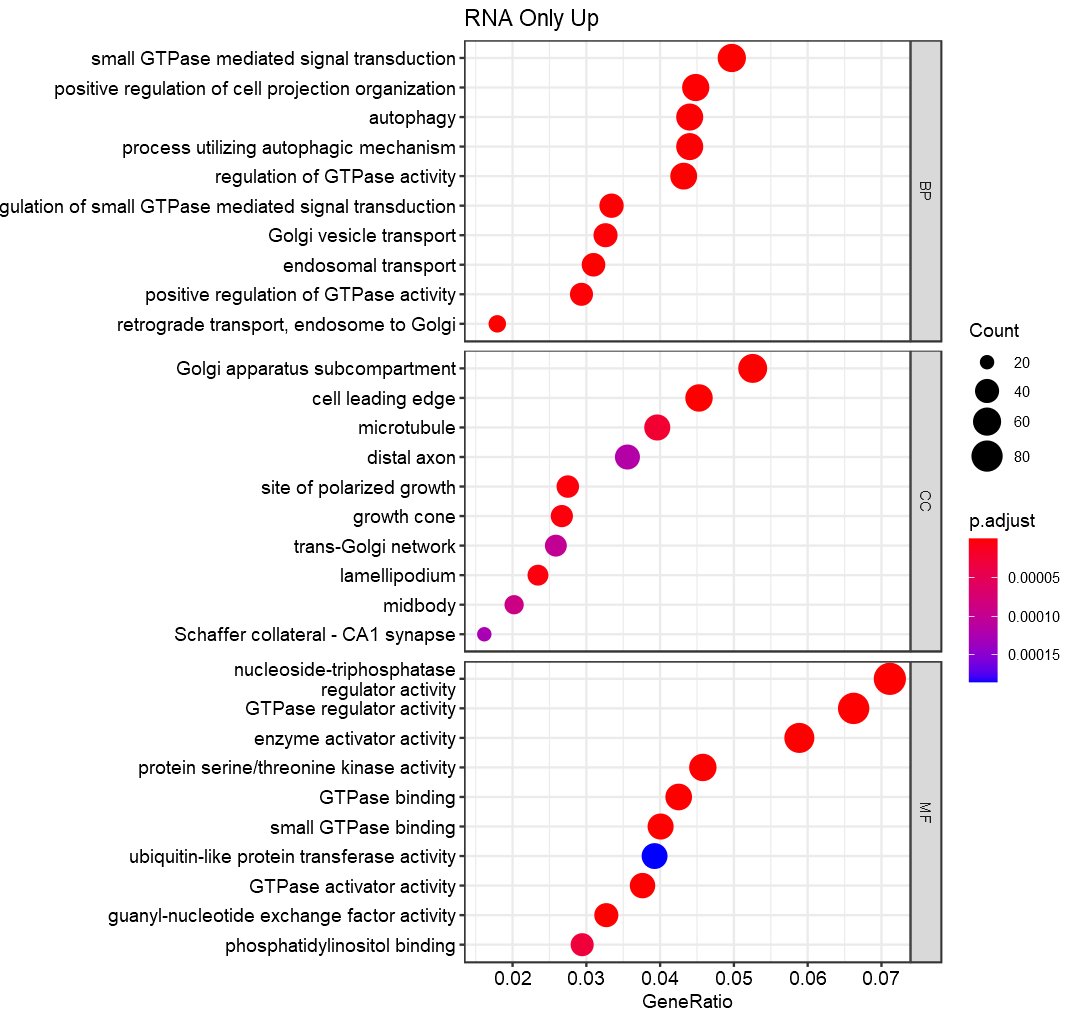

In [11]:
## GO enrichment
#RNA only up
condstr <- "sym_rna_only_up"

sym_rna_only_up <- intersect(sym_mrna_only, sym_mrna_up)
verb("sym_rna_only_up: %d\n", length(sym_rna_only_up))


library(clusterProfiler)
library(DOSE)

entrez.id <- unique(entrezdf$entrez_id[ match(sym_rna_only_up, entrezdf$gene_name) ])

set.seed(40)
egmt_rna_only_up <- enrichGO(entrez.id, OrgDb=org.Mm.eg.db, keyType = "ENTREZID", ont='all',
                             pvalueCutoff = 0.05, pAdjustMethod = "BH", qvalueCutoff = 0.05,
                             minGSSize = 10, maxGSSize = 500)
egmt_rna_only_up <- setReadable(egmt_rna_only_up, OrgDb=org.Mm.eg.db, keyType="ENTREZID")

head(egmt_rna_only_up)
dim(egmt_rna_only_up)

write.table(egmt_rna_only_up, file = sprintf('table/fig1.%s.go.txt', condstr),
            row.names = TRUE , col.names = NA ,  sep="\t"  , quote = FALSE  )




##dotplot
n_top_egmt <- 10
gg <- dotplot(egmt_rna_only_up, x = "GeneRatio",
              color = "p.adjust", showCategory = n_top_egmt, split = "ONTOLOGY", font.size = 11,
              title = "RNA Only Up") + facet_grid(ONTOLOGY~., scale="free")

print_figure(gg, width=9, height=8.5,
             file=sprintf("dotplot.%s.enricher.go_top%d", condstr, n_top_egmt))